## My first neural network

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
n_features = 10 

In [4]:
n_dense_neurons = 3

# y = Wx+b

In [5]:
x = tf.placeholder(tf.float32, shape=(None, n_features)) # x placeholder for x variable

In [6]:
b = tf.Variable(tf.zeros([n_dense_neurons])) # bias variable 

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))  # weight 

In [8]:
Wx = tf.matmul(x, W) # matrix multiply for x and W

In [9]:
y = tf.add(Wx, b) # addition Wx and b 

In [10]:
a = tf.sigmoid(y) # activation function

In [11]:
init = tf.global_variables_initializer() # global varible initializer

In [12]:
with tf.Session() as sess: # running session
    sess.run(init)
    layer_out = sess.run(a, feed_dict = {x: np.random.random([1, n_features])})

In [13]:
layer_out # result

array([[0.36495826, 0.06470055, 0.44788852]], dtype=float32)

## Full network example

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

In [27]:
x_data = np.linspace(0, 10, 10)+np.random.uniform(-1.5, 1.5, 10)

In [28]:
x_data

array([-0.43458007,  1.07266269,  3.0699926 ,  4.77707206,  3.99205597,
        6.30408148,  7.36315215,  8.3368149 ,  7.39120756,  9.93694113])

In [29]:
y_label = np.linspace(0, 10, 10)+np.random.uniform(-1.5, 1.5, 10)

In [30]:
y_label

array([ 0.86165955, -0.34789614,  1.19201386,  3.51801544,  5.43475754,
        6.49119964,  8.03700367,  9.17924999,  8.62017   , 11.28684807])

In [31]:
import matplotlib.pyplot as plt

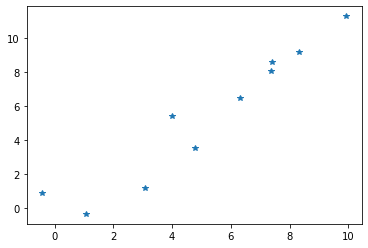

In [35]:
plt.plot(x_data, y_label, "*")

random value for variables (m, b)

In [39]:
np.random.rand(2)

array([0.89054319, 0.61365383])

In [40]:
m = tf.Variable(0.89)
b = tf.Variable(0.61)

# cost function

In [43]:
err = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x+b # predicted value
    err += (y-y_hat)**2 # The cost we want to minimize

# optimizer

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(err)

# initialize variables

In [47]:
init = tf.global_variables_initializer()

# create session and run

In [50]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    
    for i in range(epochs):
        sess.run(train)
    
    # fetch back results
    final_slope, final_intercept = sess.run([m, b])

In [54]:
final_slope, final_intercept

(1.0533504, 0.14964703)

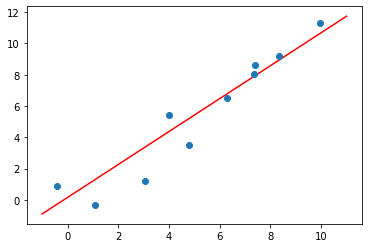

In [64]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test+final_intercept

plt.plot(x_test, y_pred_plot, "r")
plt.plot(x_data, y_label, "o")